In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')               

In [61]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
                        postgres_db))

education_df = pd.read_sql_query('select * from useducation', con = engine)

engine.dispose()                                                    

In [62]:
fill_list = ["STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", 
             "GRADES_12_G", "GRADES_1_8_G", "GRADES_9_12_G", "GRADES_ALL_G"]
             
states = education_df["STATE"].unique()
             
for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, 
    fill_list].interpolate()         

education_df.dropna(inplace = True)                                     

# 1) Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [63]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,...,415.000000,415.000000,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,415.000000,415.000000,415.000000,415.000000
mean,2007.542169,9.435114e+05,1.050078e+07,9.452970e+05,4.861435e+06,4.694044e+06,1.060764e+07,5.483496e+06,3.099217e+06,4.805515e+05,...,72305.715663,72921.934940,64247.127711,5.827269e+05,2.858815e+05,8.910099e+05,236.627931,279.547505,219.313624,263.563558
std,5.263816,1.120863e+06,1.308047e+07,1.325607e+06,6.150820e+06,6.082528e+06,1.332400e+07,6.988600e+06,3.718716e+06,5.858813e+05,...,86175.549811,85813.359479,76734.979844,6.919342e+05,3.396827e+05,1.057819e+06,8.992015,9.599459,7.583719,6.935179
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2003.000000,2.795105e+05,2.672062e+06,2.594065e+05,1.445588e+06,9.448265e+05,2.624235e+06,1.404482e+06,8.131670e+05,1.284545e+05,...,20499.500000,20926.500000,18536.500000,1.666610e+05,8.207900e+04,2.598385e+05,231.945184,274.367612,214.914848,259.312874
50%,2007.000000,6.651090e+05,6.077498e+06,5.353560e+05,2.966981e+06,2.385143e+06,6.184819e+06,3.168745e+06,1.872074e+06,3.239130e+05,...,50899.000000,50186.000000,41270.000000,4.058170e+05,1.866620e+05,6.249790e+05,238.292839,281.407120,220.829771,265.050858
75%,2011.000000,1.017251e+06,1.196548e+07,1.019472e+06,5.972396e+06,5.334070e+06,1.150164e+07,6.006730e+06,3.566994e+06,5.472210e+05,...,79410.000000,80916.500000,74850.500000,6.391890e+05,3.217070e+05,9.700250e+05,242.640565,286.086248,224.467909,268.199020
max,2015.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,277.191363


In [ ]:
# The points that I find remarkable are that the average TOTAL_REVENUE is less than TOTAL_EXPENDITURE, which means that states 
# run budget deficit on average; that INSTRUCTION_EXPENDITURE comprises nearly half of the total expenditures on education, and 
# that the average math scores are higher than the average reading scores but the standard deviation of the average math scores 
# is also higher than the standard deviation of the average reading scores.              

# 2) Choose a state and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

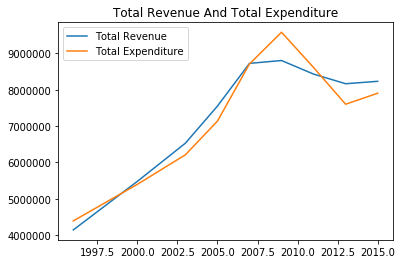

In [64]:
plt.plot(education_df.loc[education_df.STATE == "ARIZONA", "YEAR"], education_df.loc[education_df.STATE == "ARIZONA", 
        "TOTAL_REVENUE"], label = "Total Revenue")

plt.plot(education_df.loc[education_df.STATE == "ARIZONA", "YEAR"], education_df.loc[education_df.STATE == "ARIZONA", 
        "TOTAL_EXPENDITURE"], label = "Total Expenditure")

plt.title("Total Revenue And Total Expenditure")
plt.legend()
plt.show()      

# 3) In your chosen state, which of the lessons are the students more successful, math or reading?

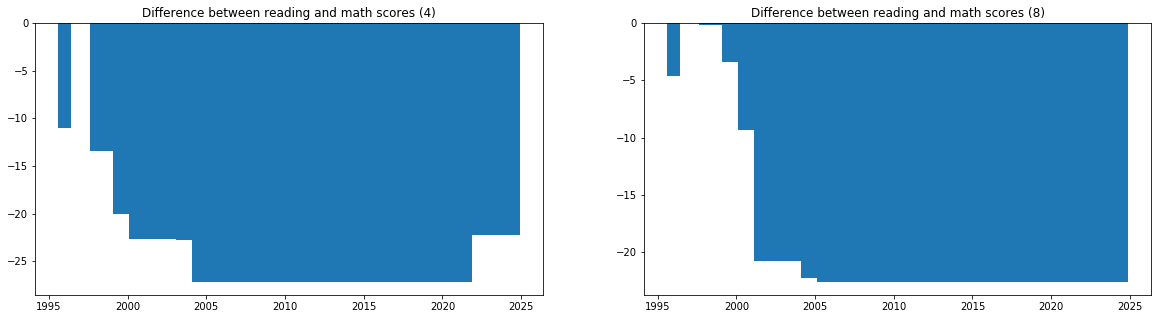

difference between reading and math scores (4)
211    -11.046152
418    -13.419344
574    -20.038595
678    -22.657936
782    -22.416309
889    -20.001836
995    -22.762547
1099   -27.170780
1201   -22.300419
dtype: float64
difference between reading and math scores (8)
211     -4.591197
418     -0.195967
574     -3.368384
678     -9.357312
782    -20.748679
889    -10.165252
995     -8.067329
1099   -22.294430
1201   -22.602471
dtype: float64


In [65]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(education_df.loc[education_df.STATE == "ARIZONA", "YEAR"], education_df.loc[education_df.STATE == "ARIZONA", 
        "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "ARIZONA", "AVG_MATH_4_SCORE"])

plt.title("Difference Between Reading And Math Scores (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == "ARIZONA", "YEAR"], education_df.loc[education_df.STATE == "ARIZONA", 
        "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "ARIZONA", "AVG_MATH_8_SCORE"])

plt.title("Difference Between Reading And Math Scores (8)")

plt.show()
      
print("Difference Between Reading And Math Scores (4)")
print(education_df.loc[education_df.STATE == "ARIZONA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "ARIZONA", "AVG_MATH_4_SCORE"])
print("Difference Between Reading And Math Scores (8)")
print(education_df.loc[education_df.STATE == "ARIZONA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "ARIZONA", "AVG_MATH_8_SCORE"])           

In [ ]:
# Students are more successful at math than at reading in Arizona.

# 4) What are the distributions of the math and reading scores in the sample?

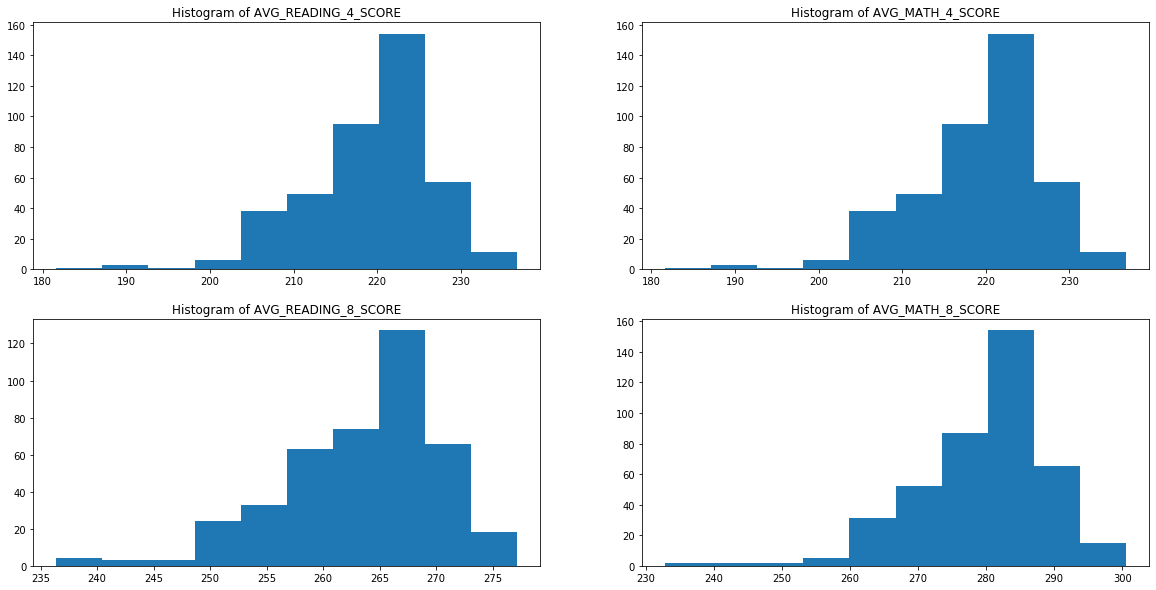

In [66]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("Histogram Of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram Of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("Histogram Of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("Histogram Of {}".format("AVG_MATH_8_SCORE"))

plt.show()

In [ ]:
# The distributions are not normal distributions, they are a little skewed to the left for both writing and reading. What 
# this means is that the average of the scores are lower than the median. 

# 5) Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions on the distributions of the score variables.

In [67]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
                        postgres_db))

education_df = pd.read_sql_query('select * from useducation', con = engine)

engine.dispose()

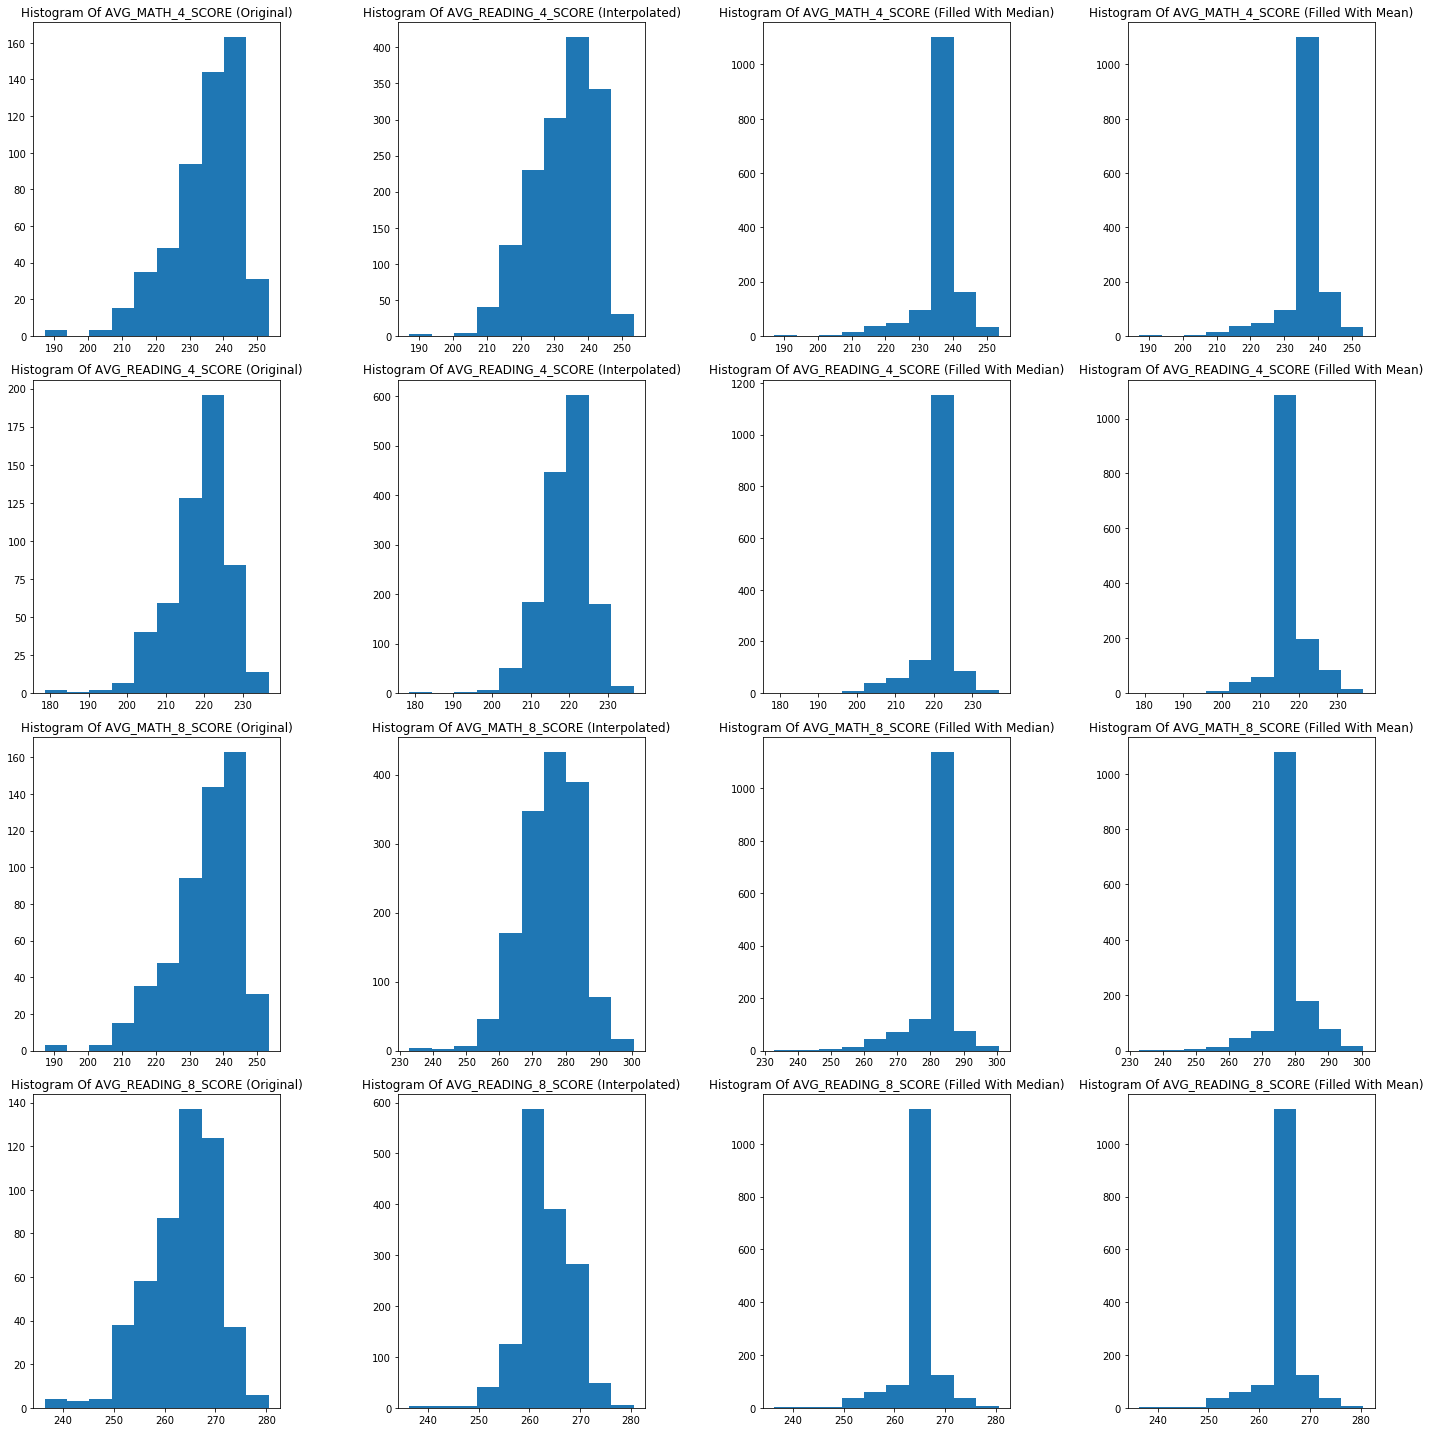

In [71]:
plt.figure(figsize = (20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram Of {} (Original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("Histogram Of {} (Interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("Histogram Of {} (Filled With Median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("Histogram Of {} (Filled With Mean)".format("AVG_MATH_4_SCORE"))




plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("Histogram Of {} (Original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("Histogram Of {} (Interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("Histogram Of {} (Filled With Median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("Histogram Of {} (Filled With Mean)".format("AVG_READING_4_SCORE"))




plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram Of {} (Original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("Histogram Of {} (Interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("Histogram Of {} (Filled With Median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("Histogram Of {} (Filled With Mean)".format("AVG_MATH_8_SCORE"))




plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("Histogram Of {} (Original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("Histogram Of {} (Interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("Histogram Of {} (Filled With Median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("Histogram Of {} (Filled With Mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

The technique to fill in the missing values greatly affects the distributions of the variables. Particularly in this case, filling with median or mean has the greatest effect. It is likely due to the fact that there are a lot of missing values in the data. The change in the distribution may have some serious effects on the model results. Thus, instead of filling in the missing values with median or mean, they may be filled in using interpolation or the missing values may just be discarded.